# IE 582 - HW1

# Task1

In [294]:
#Reading csv file
data_2018_2019 = read.csv("2018-2019.csv")
data_2019_2020 = read.csv("2019-2020.csv")
data_2020_2021 = read.csv("2020-2021.csv")

In [295]:
#Combining datas
data_2018_2019 = data_2018_2019[c(1:41)]
data_2019_2020 = data_2019_2020[-c(3)]
data_2019_2020 = data_2019_2020[c(1:41)]
data_2020_2021 = data_2020_2021[-c(3)]
data_2020_2021 = data_2020_2021[c(1:41)]
data_overall = rbind(data_2018_2019,data_2019_2020, data_2020_2021)

## 1. Histogram Diagrams

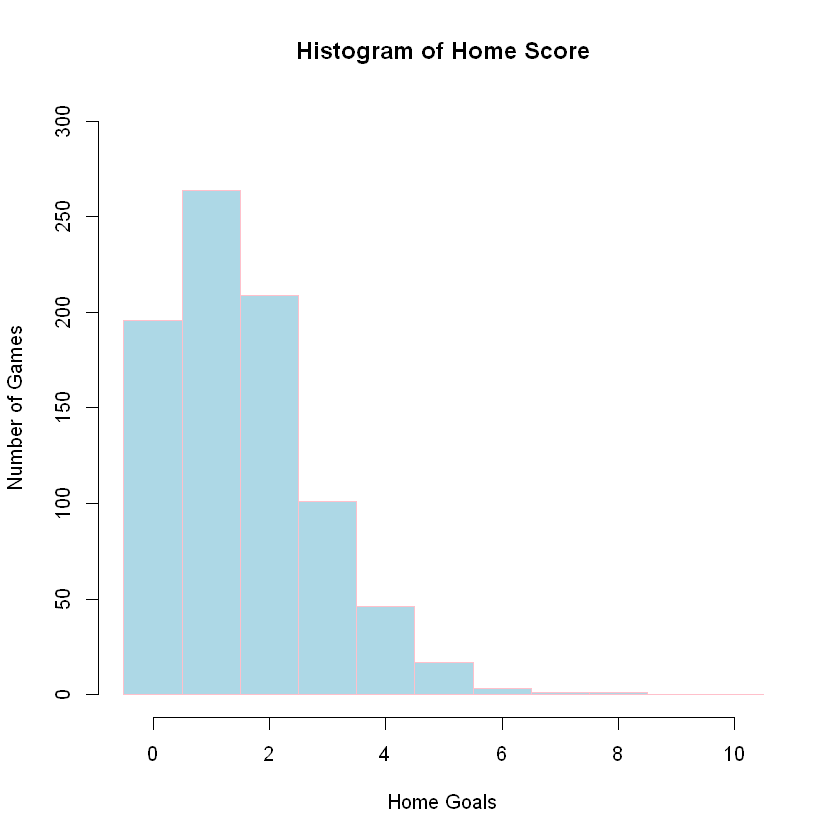

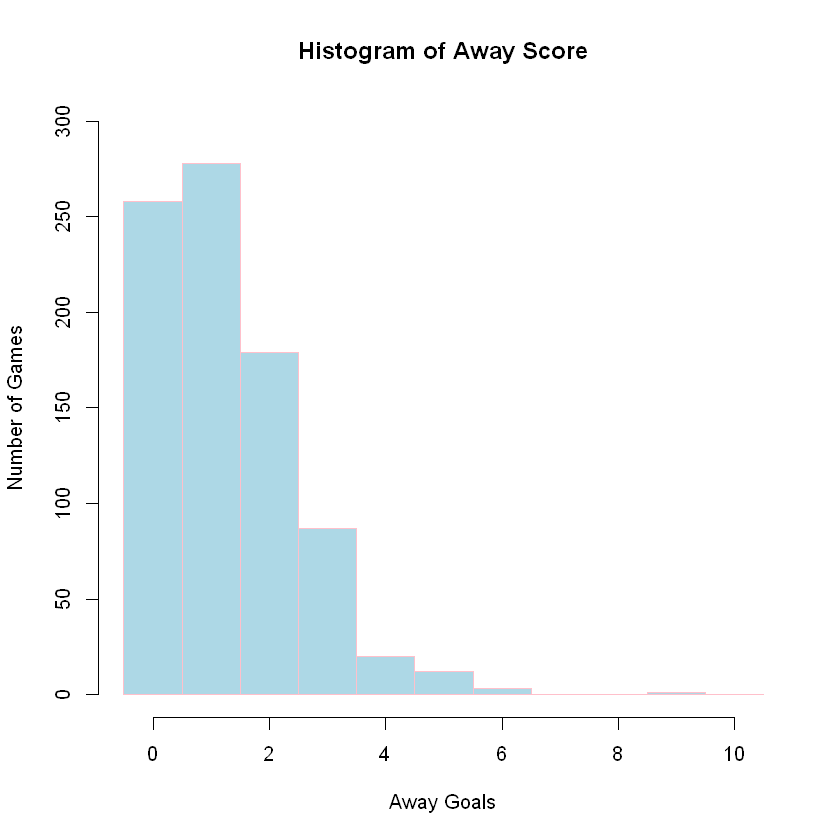

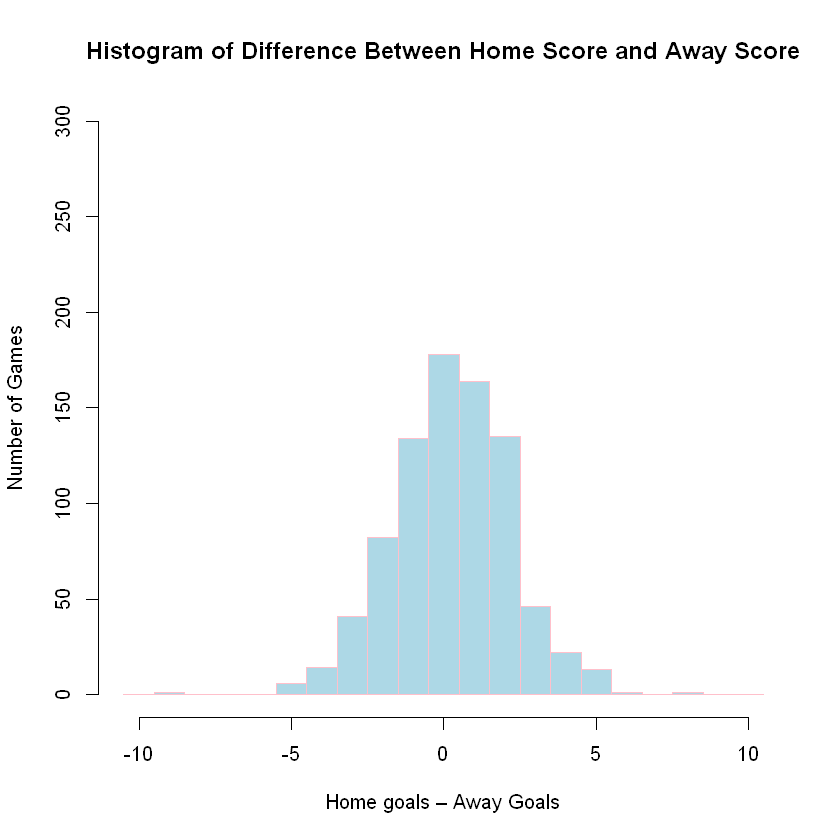

In [296]:
#Histograms
hist(data_overall$FTHG,
     main="Histogram of Home Score",
     ylab="Number of Games",xlab="Home Goals",
     breaks=seq(-0.5,10.5,by=1),
     col = "lightblue", border = "pink", ylim=c(0,300))
hist(data_overall$FTAG,
     main="Histogram of Away Score",
     ylab="Number of Games",xlab="Away Goals",
     breaks=seq(-0.5,10.5,by=1),
     col = "lightblue", border = "pink",ylim=c(0,300))
hist(data_overall$FTHG - data_overall$FTAG,
     main="Histogram of Difference Between Home Score and Away Score",
     ylab="Number of Games",xlab="Home goals – Away Goals",
     breaks=seq(-10.5,10.5,by=1),
     col = "lightblue", border = "pink",ylim=c(0,300))

## 2.Probability Distribution

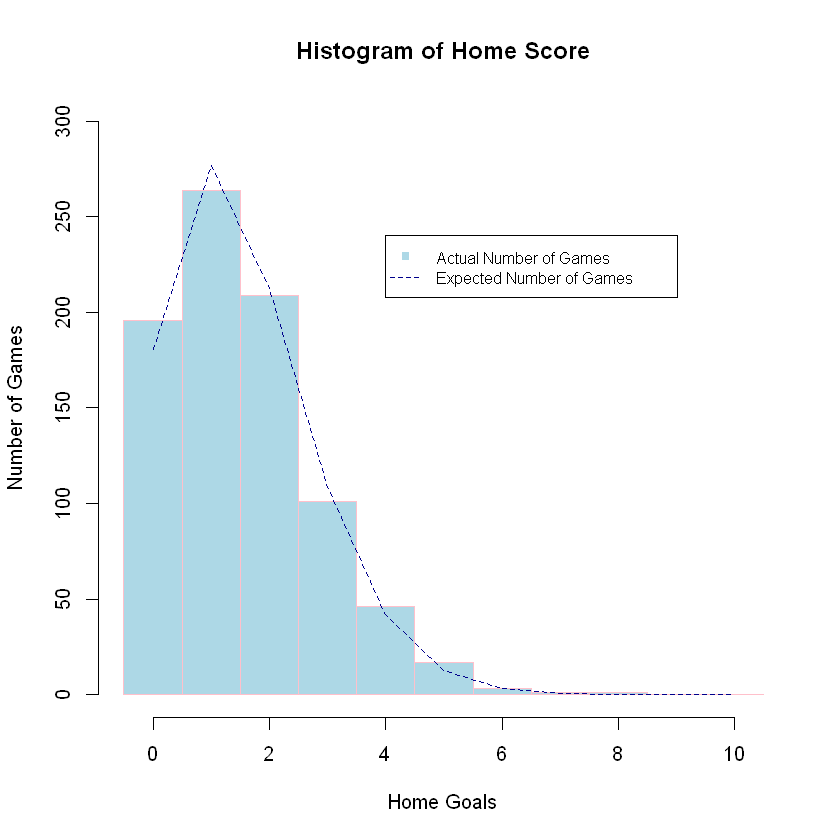

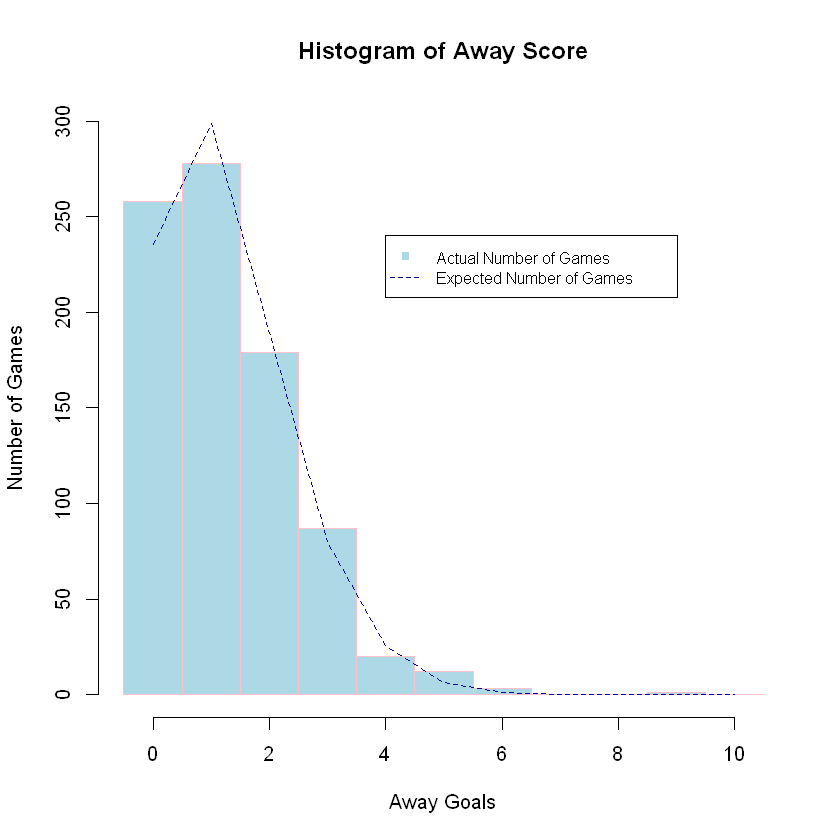

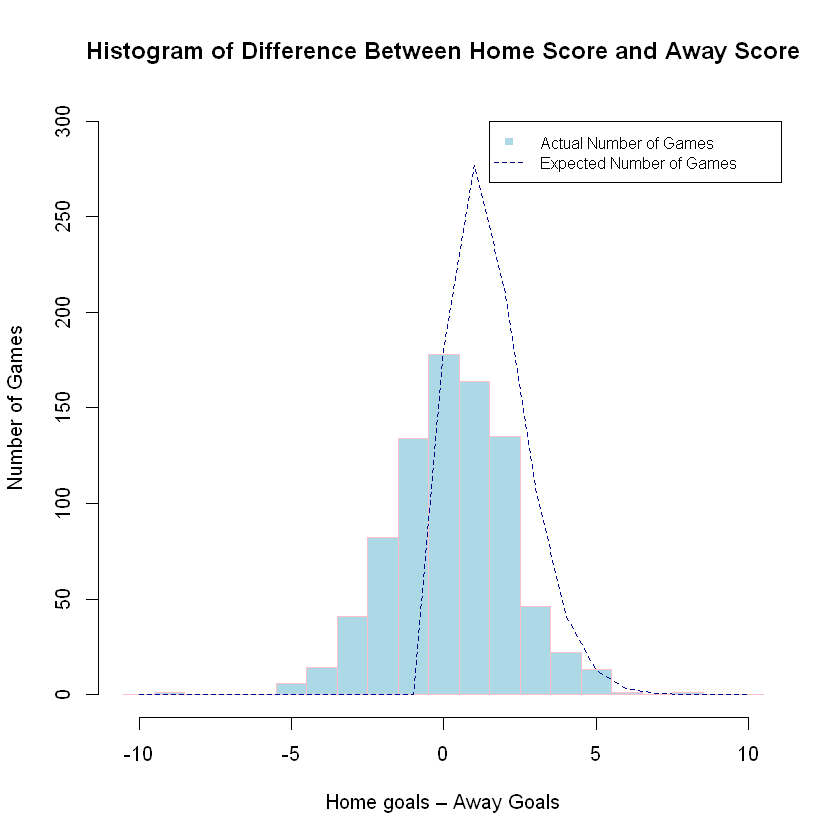

In [297]:
#Finding expected number of games with Poisson distribution for Home Goals
mean = mean(data_overall$FTHG)
len = length(data_overall$FTHG)
pois = dpois(0:10, mean)
exp_game = pois *len 
hist(data_overall$FTHG,
     main="Histogram of Home Score",
     ylab="Number of Games",xlab="Home Goals",
     breaks=seq(-0.5,10.5,by=1),
     col = "lightblue", border = "pink",ylim=c(0,300))
lines(0:10, exp_game, type = "l", lty = 2,col = "darkblue")
legend(4, 240, legend=c("Actual Number of Games", "Expected Number of Games"),
col=c("lightblue", "darkblue"), lty=c(0,2), pch=c(15,-1), cex=0.8)

#Finding expected number of games with Poisson distribution for Away Goals
mean2 = mean(data_overall$FTAG)
len2 = length(data_overall$FTAG)
pois2 = dpois(0:10, mean2)
exp_game2 = pois2 *len2
hist(data_overall$FTAG,
     main="Histogram of Away Score",
     ylab="Number of Games",xlab="Away Goals",
     breaks=seq(-0.5,10.5,by=1),
     col = "lightblue", border = "pink",ylim=c(0,300))
lines(0:10, exp_game2, type = "l", lty = 2,col = "darkblue")
legend(4, 240, legend=c("Actual Number of Games", "Expected Number of Games"),
col=c("lightblue", "darkblue"), lty=c(0,2), pch=c(15,-1), cex=0.8)

#Finding expected number of games with Poisson distribution for Home Goals-Away Goals
mean3 = mean(data_overall$FTHG - data_overall$FTAG)
len3 = length(data_overall$FTHG)
pois3 = dpois(-10:10, mean)
exp_game3 = pois3 *len3 
hist(data_overall$FTHG - data_overall$FTAG,
     main="Histogram of Difference Between Home Score and Away Score",
     ylab="Number of Games",xlab="Home goals – Away Goals",ylim=c(0,300),
     breaks=seq(-10.5,10.5,by=1),
     col = "lightblue", border = "pink",)
lines(-10:10, exp_game3, type = "l", lty = 2,col = "darkblue")
legend(1.5, 300, legend=c("Actual Number of Games", "Expected Number of Games"),
col=c("lightblue", "darkblue"), lty=c(0,2), pch=c(15,-1), cex=0.8)


###### 
To be able to identify if the propability distribution look like Poisson distribution, expected number of games are calculated for each case and plotted on the same histagram of the case. According to plots,distrubution of Home Score and Away Score does look like Poisson distrubution, however, distrubution of Home Score-Away Score looks like Normal distrubition.


# Task 2

## 1. Calculating P(x)=1/odd

### Bookmaker 365

In [298]:
bahis365 = data_overall[24:26]
bahis365$B365H = 1/bahis365$B365H
bahis365$B365D = 1/bahis365$B365D
bahis365$B365A = 1/bahis365$B365A

### Bookmaker BW

In [299]:
bahisBW = data_overall[27:29]
bahisBW$BWH = 1/bahisBW$BWH
bahisBW$BWD = 1/bahisBW$BWD
bahisBW$BWA = 1/bahisBW$BWA

### Bookmaker IW

In [300]:
bahisIW = data_overall[30:32]
bahisIW$IWH = 1/bahisIW$IWH
bahisIW$IWD = 1/bahisIW$IWD
bahisIW$IWA = 1/bahisIW$IWA

### Bookmaker PS

In [301]:
bahisPS = data_overall[33:35]
bahisPS$PSH = 1/bahisPS$PSH
bahisPS$PSD = 1/bahisPS$PSD
bahisPS$PSA = 1/bahisPS$PSA

## 2. Using normalization formula at “Odds and Probabilities”

### Bookmaker B365

In [302]:
len = length(bahis365$B365H)
for (i in 1:len){
    tot= bahis365$B365H[i] + bahis365$B365D[i] + bahis365$B365A[i]
    bahis365$B365H[i] = bahis365$B365H[i] / tot
    bahis365$B365D[i] = bahis365$B365D[i] / tot
    bahis365$B365A[i] = bahis365$B365A[i] / tot  
}

bahis365$Res = data_overall$FTR

### Bookmaker BW

In [303]:
len = length(bahisBW$BWH)
for (i in 1:len){
    tot= bahisBW$BWH[i] + bahisBW$BWD[i] + bahisBW$BWA[i]
    bahisBW$BWH[i] = bahisBW$BWH[i] / tot
    bahisBW$BWD[i] = bahisBW$BWD[i] / tot
    bahisBW$BWA[i] = bahisBW$BWA[i] / tot  
}

bahisBW$Res = data_overall$FTR

### Bookmaker IW

In [304]:
len = length(bahisIW$IWH)
for (i in 1:len){
    tot= bahisIW$IWH[i] + bahisIW$IWD[i] + bahisIW$IWA[i]
    bahisIW$IWH[i] = bahisIW$IWH[i] / tot
    bahisIW$IWD[i] = bahisIW$IWD[i] / tot
    bahisIW$IWA[i] = bahisIW$IWA[i] / tot  
}

bahisIW$Res = data_overall$FTR

### Bookmaker PS

In [305]:
len = length(bahisPS$PSH)
for (i in 1:len){
    tot= bahisPS$PSH[i] + bahisPS$PSD[i] + bahisPS$PSA[i]
    bahisPS$PSH[i] = bahisPS$PSH[i] / tot
    bahisPS$PSD[i] = bahisPS$PSD[i] / tot
    bahisPS$PSA[i] = bahisPS$PSA[i] / tot  
}

bahisPS$Res = data_overall$FTR

## 3 and 4. Plot of P(home win) – P(away win) on x-axis and P (tie) on y-axis with first probability calculation; then plot the actual probabilities calculated using the results for each bookmaker.

### Bookmaker B365

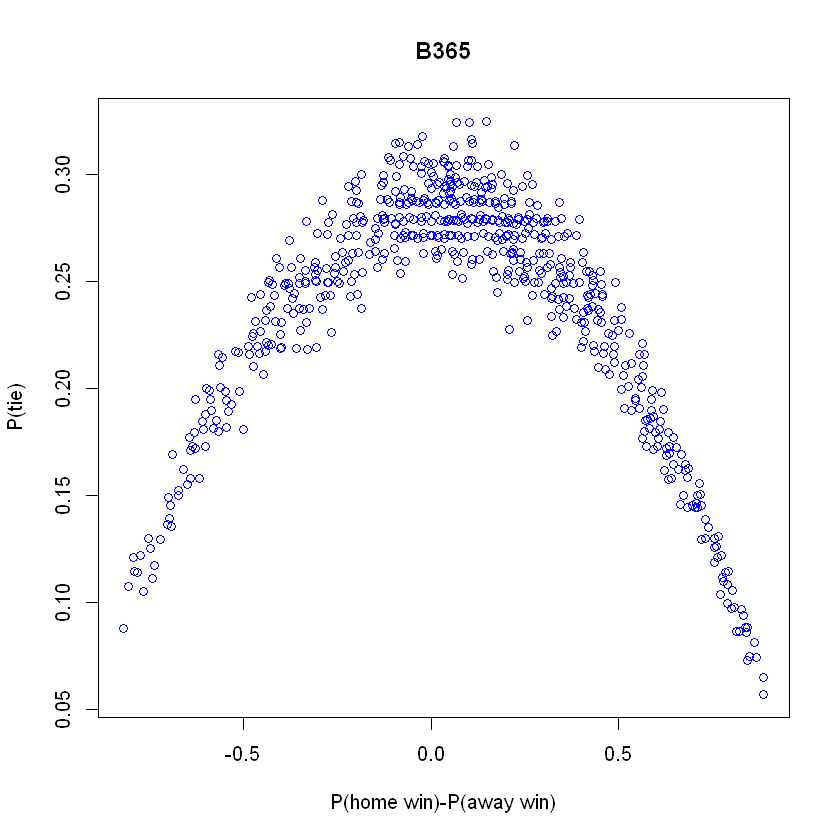

In [306]:
#Ploting actual probabilities
bahis365$diff = bahis365$B365H - bahis365$B365A
plot(bahis365$diff, bahis365$B365D,
    main="B365",
    xlab="P(home win)-P(away win)",
    ylab="P(tie)",
    col="blue"
    )

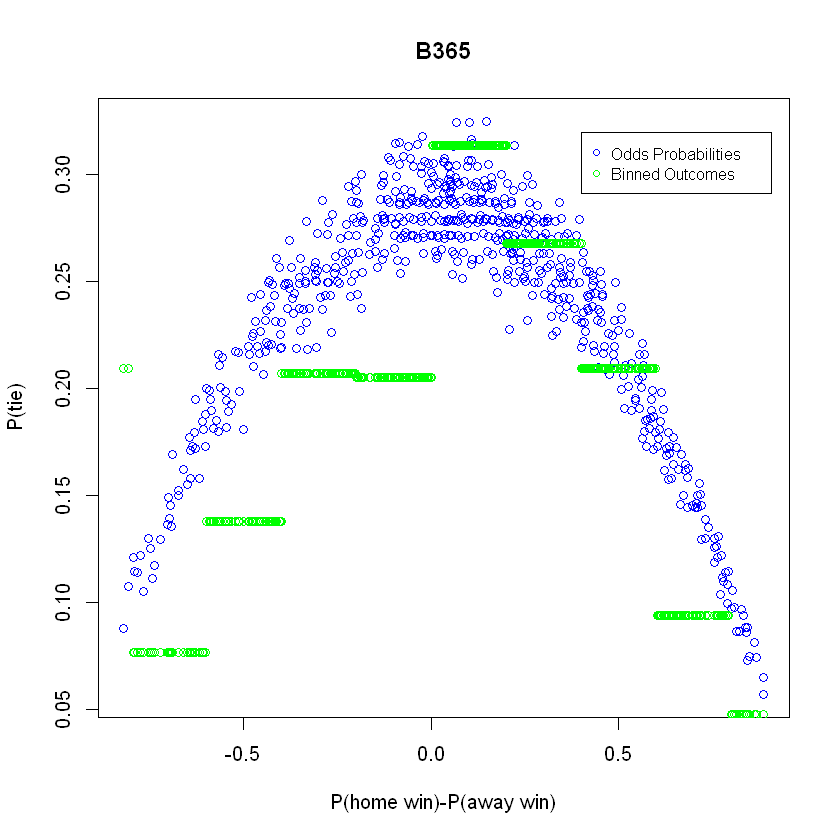

In [307]:
#discretizing P(home win) – P(away win) values into bins
bahis365$disc = cut(bahis365$diff, breaks=seq(-1,1,by=0.2))
c1=0
c2=0
c3=0
c4=0
c5=0
c6=0
c7=0
c8=0
c9=0
c10=0
#calculating the number of games ended as “Draw” in the corresponding bin.
for (i in 1:len){
        if(bahis365$Res[i] == "D" & bahis365$disc[i] == "[-1,-0.8]" ){
            c1 = 1 + c1
        }else if(bahis365$Res[i] == "D" & bahis365$disc[i] == "(-0.8,-0.6]" ){
            c2 = 1 + c2
        }else if(bahis365$Res[i] == "D" & bahis365$disc[i] == "(-0.6,-0.4]" ){
            c3 = 1 + c3
        }else if(bahis365$Res[i] == "D" & bahis365$disc[i] == "(-0.4,-0.2]" ){
            c4 = 1 + c4
        }else if(bahis365$Res[i] == "D" & bahis365$disc[i] == "(-0.2,0]" ){
            c5 = 1 + c5
        }else if(bahis365$Res[i] == "D" & bahis365$disc[i] == "(0,0.2]" ){
            c6 = 1 + c6
        }else if(bahis365$Res[i] == "D" & bahis365$disc[i] == "(0.2,0.4]" ){
            c7 = 1 + c7
        }else if(bahis365$Res[i] == "D" & bahis365$disc[i] == "(0.4,0.6]" ){
            c8 = 1 + c8
        }else if(bahis365$Res[i] == "D" & bahis365$disc[i] == "(0.6,0.8]"){
            c9 = 1 + c9
        }else if(bahis365$Res[i] == "D" & bahis365$disc[i] == "(0.8,1]"){
            c10 = 1 + c10
        }
}
#Dividing the number of "Draws" according to bins
for (i in 1:len){
        if(bahis365$disc[i] == "[-1,-0.8]" ){
            bahis365$cdraw[i] = c1/(sum(bahis365$disc == "[-1,-0.8]"))
        }else if(bahis365$disc[i] == "(-0.8,-0.6]" ){
            bahis365$cdraw[i] = c2/(sum(bahis365$disc == "(-0.8,-0.6]"))
        }else if(bahis365$disc[i] == "(-0.6,-0.4]" ){
            bahis365$cdraw[i] = c3/(sum(bahis365$disc == "(-0.6,-0.4]"))
        }else if(bahis365$disc[i] == "(-0.4,-0.2]" ){
            bahis365$cdraw[i] = c4/(sum(bahis365$disc == "(-0.4,-0.2]"))
        }else if(bahis365$disc[i] == "(-0.2,0]" ){
            bahis365$cdraw[i] = c5/(sum(bahis365$disc == "(-0.2,0]"))
        }else if( bahis365$disc[i] == "(0,0.2]" ){
            bahis365$cdraw[i] = c6/(sum(bahis365$disc == "(0,0.2]"))
        }else if(bahis365$disc[i] == "(0.2,0.4]" ){
            bahis365$cdraw[i] = c7/(sum(bahis365$disc == "(0.2,0.4]"))
        }else if(bahis365$disc[i] == "(0.4,0.6]" ){
            bahis365$cdraw[i] = c8/(sum(bahis365$disc == "(0.4,0.6]"))
        }else if(bahis365$disc[i] == "(0.6,0.8]"){
            bahis365$cdraw[i] = c9/(sum(bahis365$disc == "(0.6,0.8]"))
        }else if(bahis365$disc[i] == "(0.8,1]"){
            bahis365$cdraw[i] = c10/(sum(bahis365$disc == "(0.8,1]"))
        }
}
#Ploting the results
    plot(bahis365$diff, bahis365$B365D,
    main="B365",
    xlab="P(home win)-P(away win)",
    ylab="P(tie)",
    col="blue"
    )
points(bahis365$diff,bahis365$cdraw,col="green")
            
legend(0.40, 0.32, legend=c("Odds Probabilities", "Binned Outcomes"),
col=c("blue", "green"), pch=c(1,1), cex=0.8)         


###### 
Probability calculated for (0,0.2] is larger than the probability proposed by the bookmaker. So, betting on the corresponding bin can be made money in the long run. There is bias in odds in the bins of (-1,-0.8],(-0.8,-0.6],(-0.6,-0.4], (0.6,0.8], and (0.8,1], because propability values are lower than actual values.

### Bookmaker BW

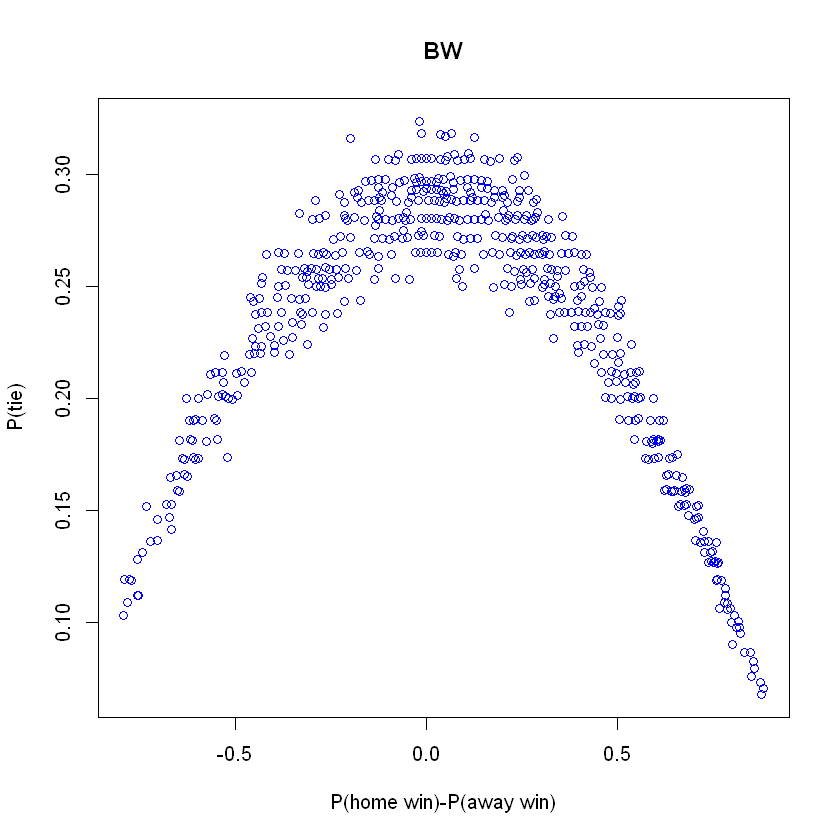

In [308]:
#Ploting actual probabilities
bahisBW$diff = bahisBW$BWH - bahisBW$BWA
plot(bahisBW$diff, bahisBW$BWD,
    main="BW",
    xlab="P(home win)-P(away win)",
    ylab="P(tie)",
    col="blue",
    )

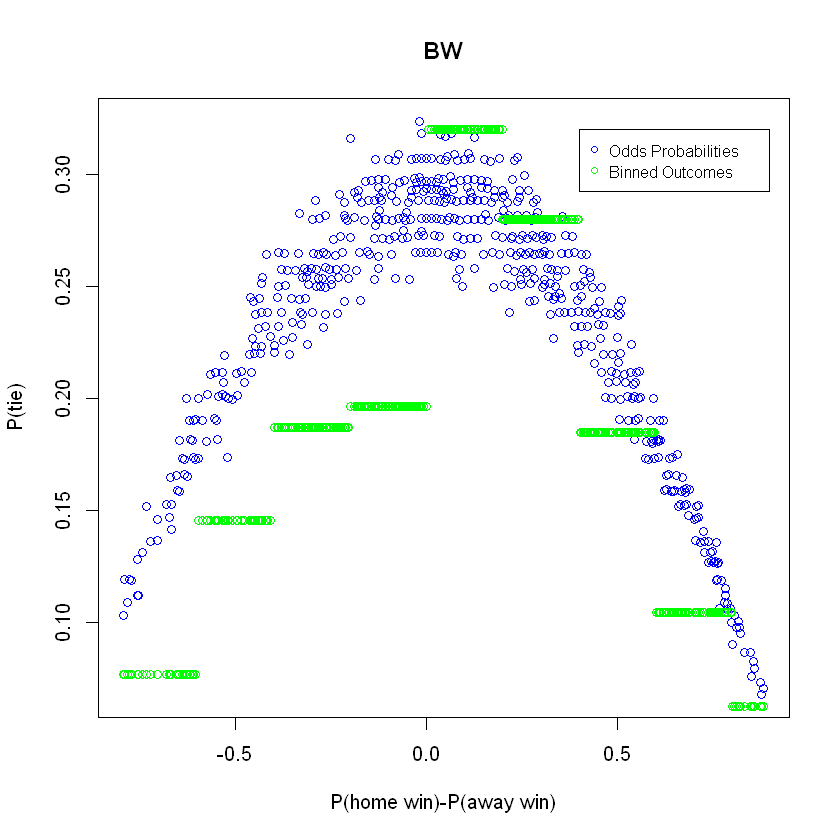

In [309]:
#discretizing P(home win) – P(away win) values into bins
bahisBW$disc = cut(bahisBW$diff, breaks=seq(-1,1,by=0.2))
c1_1=0
c2_1=0
c3_1=0
c4_1=0
c5_1=0
c6_1=0
c7_1=0
c8_1=0
c9_1=0
c1_10=0
#calculating the number of games ended as “Draw” in the corresponding bin.
for (i in 1:len){
        if(bahisBW$Res[i] == "D" & bahisBW$disc[i] == "[-1,-0.8]" ){
            c1_1 = 1 + c1_1
        }else if(bahisBW$Res[i] == "D" & bahisBW$disc[i] == "(-0.8,-0.6]" ){
            c2_1 = 1 + c2_1
        }else if(bahisBW$Res[i] == "D" & bahisBW$disc[i] == "(-0.6,-0.4]" ){
            c3_1 = 1 + c3_1
        }else if(bahisBW$Res[i] == "D" & bahisBW$disc[i] == "(-0.4,-0.2]" ){
            c4_1 = 1 + c4_1
        }else if(bahisBW$Res[i] == "D" & bahisBW$disc[i] == "(-0.2,0]" ){
            c5_1 = 1 + c5_1
        }else if(bahisBW$Res[i] == "D" & bahisBW$disc[i] == "(0,0.2]" ){
            c6_1 = 1 + c6_1
        }else if(bahisBW$Res[i] == "D" & bahisBW$disc[i] == "(0.2,0.4]" ){
            c7_1 = 1 + c7_1
        }else if(bahisBW$Res[i] == "D" & bahisBW$disc[i] == "(0.4,0.6]" ){
            c8_1 = 1 + c8_1
        }else if(bahisBW$Res[i] == "D" & bahisBW$disc[i] == "(0.6,0.8]"){
            c9_1 = 1 + c9_1
        }else if(bahisBW$Res[i] == "D" & bahisBW$disc[i] == "(0.8,1]"){
            c1_10 = 1 + c1_10
        }
}
#Dividing the number of "Draws" according to bins
for (i in 1:len){
        if(bahisBW$disc[i] == "[-1,-0.8]" ){
            bahisBW$cdraw[i] = c1_1/(sum(bahisBW$disc == "[-1,-0.8]"))
        }else if(bahisBW$disc[i] == "(-0.8,-0.6]" ){
            bahisBW$cdraw[i] = c2_1/(sum(bahisBW$disc == "(-0.8,-0.6]"))
        }else if(bahisBW$disc[i] == "(-0.6,-0.4]" ){
            bahisBW$cdraw[i] = c3_1/(sum(bahisBW$disc == "(-0.6,-0.4]"))
        }else if(bahisBW$disc[i] == "(-0.4,-0.2]" ){
            bahisBW$cdraw[i] = c4_1/(sum(bahisBW$disc == "(-0.4,-0.2]"))
        }else if(bahisBW$disc[i] == "(-0.2,0]" ){
            bahisBW$cdraw[i] = c5_1/(sum(bahisBW$disc == "(-0.2,0]"))
        }else if( bahisBW$disc[i] == "(0,0.2]" ){
            bahisBW$cdraw[i] = c6_1/(sum(bahisBW$disc == "(0,0.2]"))
        }else if(bahisBW$disc[i] == "(0.2,0.4]" ){
            bahisBW$cdraw[i] = c7_1/(sum(bahisBW$disc == "(0.2,0.4]"))
        }else if(bahisBW$disc[i] == "(0.4,0.6]" ){
            bahisBW$cdraw[i] = c8_1/(sum(bahisBW$disc == "(0.4,0.6]"))
        }else if(bahisBW$disc[i] == "(0.6,0.8]"){
            bahisBW$cdraw[i] = c9_1/(sum(bahisBW$disc == "(0.6,0.8]"))
        }else if(bahisBW$disc[i] == "(0.8,1]"){
            bahisBW$cdraw[i] = c1_10/(sum(bahisBW$disc == "(0.8,1]"))
        }
}
#Ploting the results
    plot(bahisBW$diff, bahisBW$BWD,
    main="BW",
    xlab="P(home win)-P(away win)",
    ylab="P(tie)",
    col="blue"
    )
points(bahisBW$diff,bahisBW$cdraw,col="green")
            
legend(0.40, 0.32, legend=c("Odds Probabilities", "Binned Outcomes"),
col=c("blue", "green"), pch=c(1,1), cex=0.8)

###### 
Probability calculated for (0,0.2] is larger than the probability proposed by the bookmaker. So, betting on the corresponding bin can be made money in the long run. There is bias in odds in the bins of (-1,-0.8],(-0.8,-0.6],(-0.6,-0.4],(-0.4,-0.2], (-0.2,0], (0.6,0.8], and (0.8,1], because propability values are lower than actual values.

### Bookmaker IW

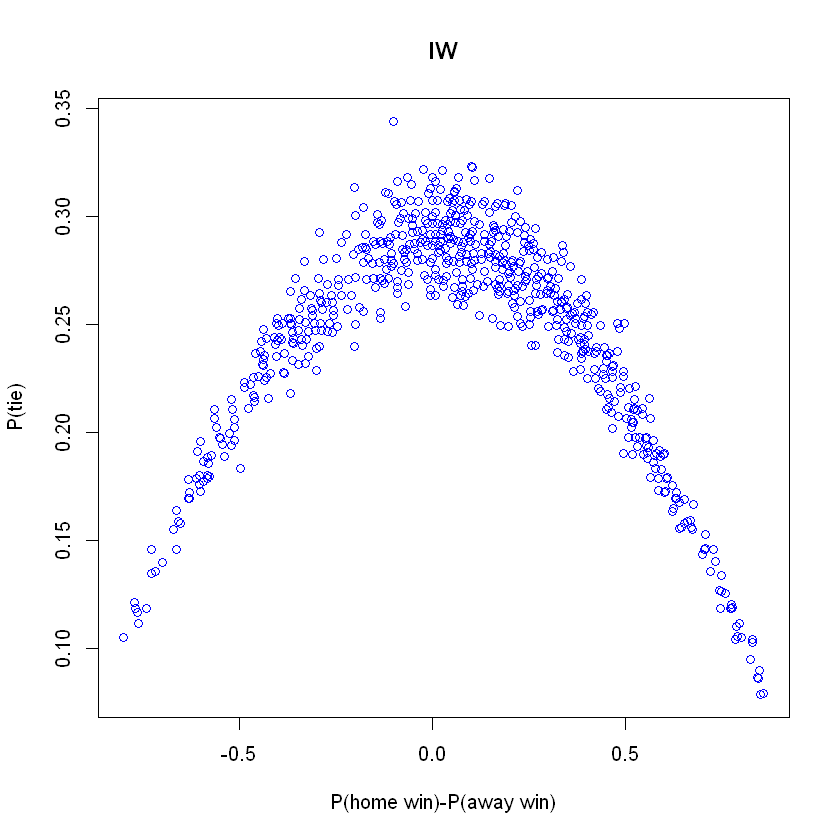

In [310]:
#Ploting actual probabilities
bahisIW$diff = bahisIW$IWH - bahisIW$IWA
plot(bahisIW$diff, bahisIW$IWD,
    main="IW",
    xlab="P(home win)-P(away win)",
    ylab="P(tie)",
    col="blue"
    )

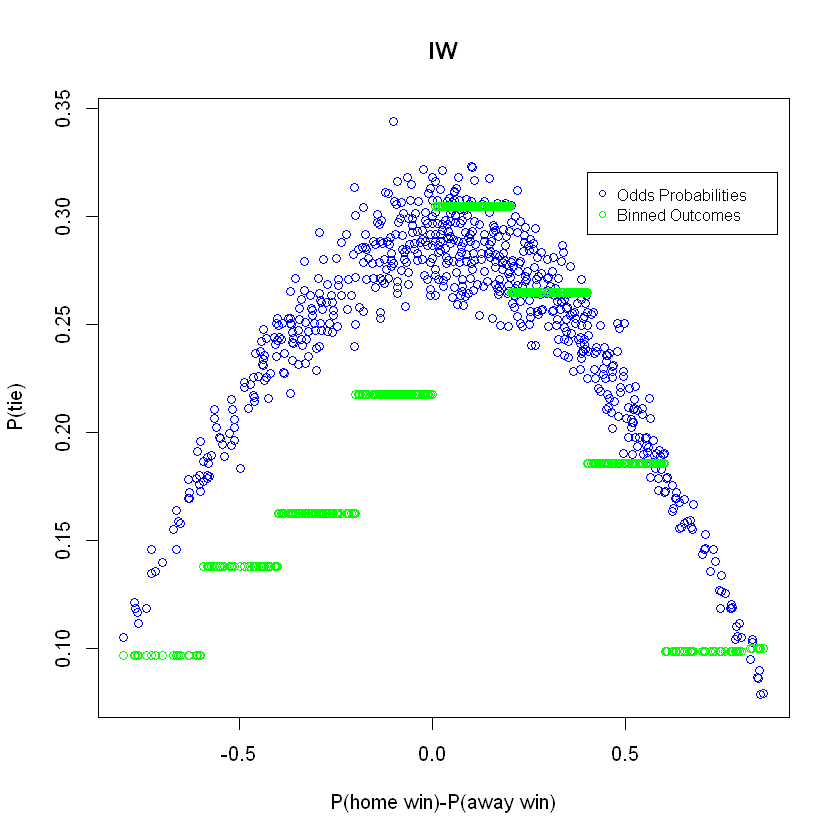

In [311]:
#discretizing P(home win) – P(away win) values into bins
bahisIW$disc = cut(bahisIW$diff, breaks=seq(-1,1,by=0.2))
c1_1=0
c2_1=0
c3_1=0
c4_1=0
c5_1=0
c6_1=0
c7_1=0
c8_1=0
c9_1=0
c1_10=0
#calculating the number of games ended as “Draw” in the corresponding bin.
for (i in 1:len){
        if(bahisIW$Res[i] == "D" & bahisIW$disc[i] == "[-1,-0.8]" ){
            c1_1 = 1 + c1_1
        }else if(bahisIW$Res[i] == "D" & bahisIW$disc[i] == "(-0.8,-0.6]" ){
            c2_1 = 1 + c2_1
        }else if(bahisIW$Res[i] == "D" & bahisIW$disc[i] == "(-0.6,-0.4]" ){
            c3_1 = 1 + c3_1
        }else if(bahisIW$Res[i] == "D" & bahisIW$disc[i] == "(-0.4,-0.2]" ){
            c4_1 = 1 + c4_1
        }else if(bahisIW$Res[i] == "D" & bahisIW$disc[i] == "(-0.2,0]" ){
            c5_1 = 1 + c5_1
        }else if(bahisIW$Res[i] == "D" & bahisIW$disc[i] == "(0,0.2]" ){
            c6_1 = 1 + c6_1
        }else if(bahisIW$Res[i] == "D" & bahisIW$disc[i] == "(0.2,0.4]" ){
            c7_1 = 1 + c7_1
        }else if(bahisIW$Res[i] == "D" & bahisIW$disc[i] == "(0.4,0.6]" ){
            c8_1 = 1 + c8_1
        }else if(bahisIW$Res[i] == "D" & bahisIW$disc[i] == "(0.6,0.8]"){
            c9_1 = 1 + c9_1
        }else if(bahisIW$Res[i] == "D" & bahisIW$disc[i] == "(0.8,1]"){
            c1_10 = 1 + c1_10
        }
}
#Dividing the number of "Draws" according to bins
for (i in 1:len){
        if(bahisIW$disc[i] == "[-1,-0.8]" ){
            bahisIW$cdraw[i] = c1_1/(sum(bahisIW$disc == "[-1,-0.8]"))
        }else if(bahisIW$disc[i] == "(-0.8,-0.6]" ){
            bahisIW$cdraw[i] = c2_1/(sum(bahisIW$disc == "(-0.8,-0.6]"))
        }else if(bahisIW$disc[i] == "(-0.6,-0.4]" ){
            bahisIW$cdraw[i] = c3_1/(sum(bahisIW$disc == "(-0.6,-0.4]"))
        }else if(bahisIW$disc[i] == "(-0.4,-0.2]" ){
            bahisIW$cdraw[i] = c4_1/(sum(bahisIW$disc == "(-0.4,-0.2]"))
        }else if(bahisIW$disc[i] == "(-0.2,0]" ){
            bahisIW$cdraw[i] = c5_1/(sum(bahisIW$disc == "(-0.2,0]"))
        }else if( bahisIW$disc[i] == "(0,0.2]" ){
            bahisIW$cdraw[i] = c6_1/(sum(bahisIW$disc == "(0,0.2]"))
        }else if(bahisIW$disc[i] == "(0.2,0.4]" ){
            bahisIW$cdraw[i] = c7_1/(sum(bahisIW$disc == "(0.2,0.4]"))
        }else if(bahisIW$disc[i] == "(0.4,0.6]" ){
            bahisIW$cdraw[i] = c8_1/(sum(bahisIW$disc == "(0.4,0.6]"))
        }else if(bahisIW$disc[i] == "(0.6,0.8]"){
            bahisIW$cdraw[i] = c9_1/(sum(bahisIW$disc == "(0.6,0.8]"))
        }else if(bahisIW$disc[i] == "(0.8,1]"){
            bahisIW$cdraw[i] = c1_10/(sum(bahisIW$disc == "(0.8,1]"))
        }
}
#Ploting the results
    plot(bahisIW$diff, bahisIW$IWD,
    main="IW",
    xlab="P(home win)-P(away win)",
    ylab="P(tie)",
    col="blue"
    )
points(bahisIW$diff,bahisIW$cdraw,col="green")
            
legend(0.40, 0.32, legend=c("Odds Probabilities", "Binned Outcomes"),
col=c("blue", "green"), pch=c(1,1), cex=0.8)

###### 
There is no probability calculated for each bin is larger than the probability proposed by the bookmaker. There is bias in odds in the bins of (-1,-0.8],(-0.8,-0.6],(-0.6,-0.4],(-0.4,-0.2], (-0.2,0], (0.6,0.8], and (0.8,1], because propability values are lower than actual values.


### Bookmaker PS

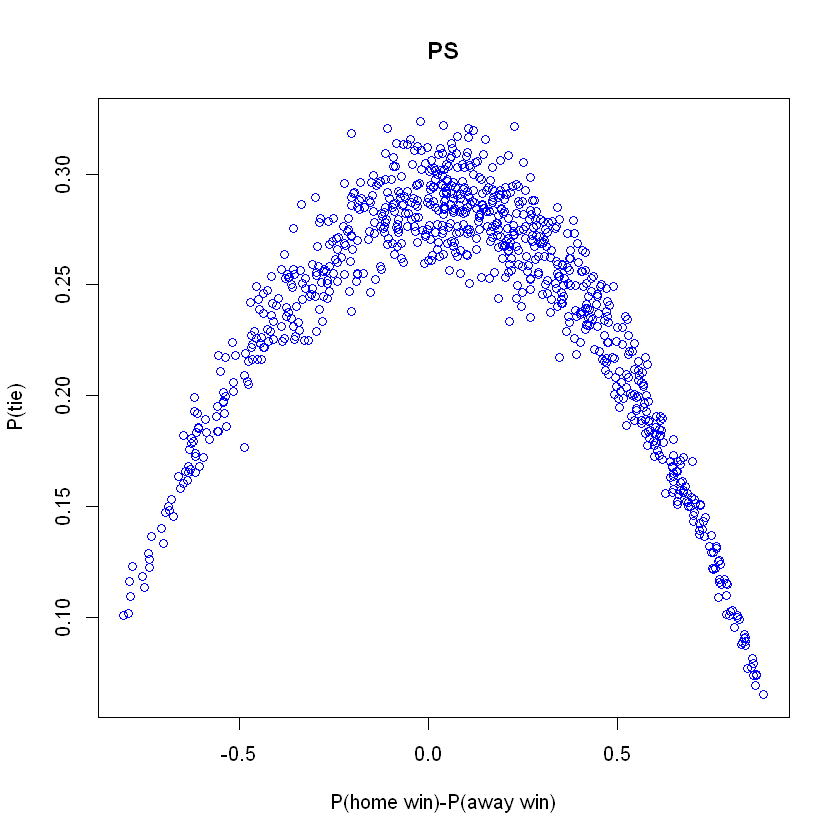

In [312]:
#Ploting actual probabilities
bahisPS$diff = bahisPS$PSH - bahisPS$PSA
plot(bahisPS$diff, bahisPS$PSD,
    main="PS",
    xlab="P(home win)-P(away win)",
    ylab="P(tie)",
    col="blue"
    )

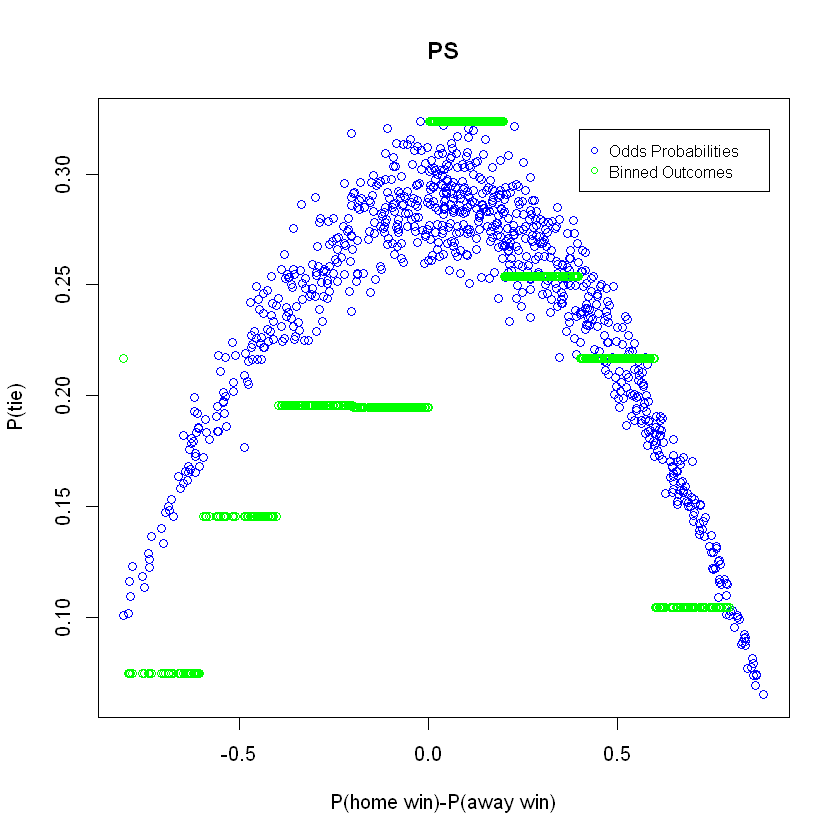

In [313]:
#discretizing P(home win) – P(away win) values into bins
bahisPS$disc = cut(bahisPS$diff, breaks=seq(-1,1,by=0.2))
c1_1=0
c2_1=0
c3_1=0
c4_1=0
c5_1=0
c6_1=0
c7_1=0
c8_1=0
c9_1=0
c1_10=0
#calculating the number of games ended as “Draw” in the corresponding bin.
for (i in 1:len){
        if(bahisPS$Res[i] == "D" & bahisPS$disc[i] == "[-1,-0.8]" ){
            c1_1 = 1 + c1_1
        }else if(bahisPS$Res[i] == "D" & bahisPS$disc[i] == "(-0.8,-0.6]" ){
            c2_1 = 1 + c2_1
        }else if(bahisPS$Res[i] == "D" & bahisPS$disc[i] == "(-0.6,-0.4]" ){
            c3_1 = 1 + c3_1
        }else if(bahisPS$Res[i] == "D" & bahisPS$disc[i] == "(-0.4,-0.2]" ){
            c4_1 = 1 + c4_1
        }else if(bahisPS$Res[i] == "D" & bahisPS$disc[i] == "(-0.2,0]" ){
            c5_1 = 1 + c5_1
        }else if(bahisPS$Res[i] == "D" & bahisPS$disc[i] == "(0,0.2]" ){
            c6_1 = 1 + c6_1
        }else if(bahisPS$Res[i] == "D" & bahisPS$disc[i] == "(0.2,0.4]" ){
            c7_1 = 1 + c7_1
        }else if(bahisPS$Res[i] == "D" & bahisPS$disc[i] == "(0.4,0.6]" ){
            c8_1 = 1 + c8_1
        }else if(bahisPS$Res[i] == "D" & bahisPS$disc[i] == "(0.6,0.8]"){
            c9_1 = 1 + c9_1
        }else if(bahisPS$Res[i] == "D" & bahisPS$disc[i] == "(0.8,1]"){
            c1_10 = 1 + c1_10
        }
}
#Dividing the number of "Draws" according to bins
for (i in 1:len){
        if(bahisPS$disc[i] == "[-1,-0.8]" ){
            bahisPS$cdraw[i] = c1_1/(sum(bahisPS$disc == "[-1,-0.8]"))
        }else if(bahisPS$disc[i] == "(-0.8,-0.6]" ){
            bahisPS$cdraw[i] = c2_1/(sum(bahisPS$disc == "(-0.8,-0.6]"))
        }else if(bahisPS$disc[i] == "(-0.6,-0.4]" ){
            bahisPS$cdraw[i] = c3_1/(sum(bahisPS$disc == "(-0.6,-0.4]"))
        }else if(bahisPS$disc[i] == "(-0.4,-0.2]" ){
            bahisPS$cdraw[i] = c4_1/(sum(bahisPS$disc == "(-0.4,-0.2]"))
        }else if(bahisPS$disc[i] == "(-0.2,0]" ){
            bahisPS$cdraw[i] = c5_1/(sum(bahisPS$disc == "(-0.2,0]"))
        }else if( bahisPS$disc[i] == "(0,0.2]" ){
            bahisPS$cdraw[i] = c6_1/(sum(bahisPS$disc == "(0,0.2]"))
        }else if(bahisPS$disc[i] == "(0.2,0.4]" ){
            bahisPS$cdraw[i] = c7_1/(sum(bahisPS$disc == "(0.2,0.4]"))
        }else if(bahisPS$disc[i] == "(0.4,0.6]" ){
            bahisPS$cdraw[i] = c8_1/(sum(bahisPS$disc == "(0.4,0.6]"))
        }else if(bahisPS$disc[i] == "(0.6,0.8]"){
            bahisPS$cdraw[i] = c9_1/(sum(bahisPS$disc == "(0.6,0.8]"))
        }else if(bahisPS$disc[i] == "(0.8,1]"){
            bahisPS$cdraw[i] = c1_10/(sum(bahisPS$disc == "(0.8,1]"))
        }
}
#Ploting the results
    plot(bahisPS$diff, bahisPS$PSD,
    main="PS",
    xlab="P(home win)-P(away win)",
    ylab="P(tie)",
    col="blue"
    )
points(bahisPS$diff,bahisPS$cdraw,col="green")
            
legend(0.40, 0.32, legend=c("Odds Probabilities", "Binned Outcomes"),
col=c("blue", "green"), pch=c(1,1), cex=0.8)

###### 
Probability calculated for (0,0.2] is larger than the probability proposed by the bookmaker. So, betting on the corresponding bin can be made money in the long run. There is bias in odds in the bins of (-1,-0.8],(-0.8,-0.6],(-0.6,-0.4],(-0.4,-0.2], (-0.2,0], (0.6,0.8], and (0.8,1], because propability values are lower than actual values.

# Task3

## Bookmaker B365

In [314]:
library(plyr)
library(dplyr)
bahis365$HR= data_overall[22]
bahis365$AR= data_overall[23]
new_bahis365 = bahis365 %>% filter(HR==0 & AR==0)


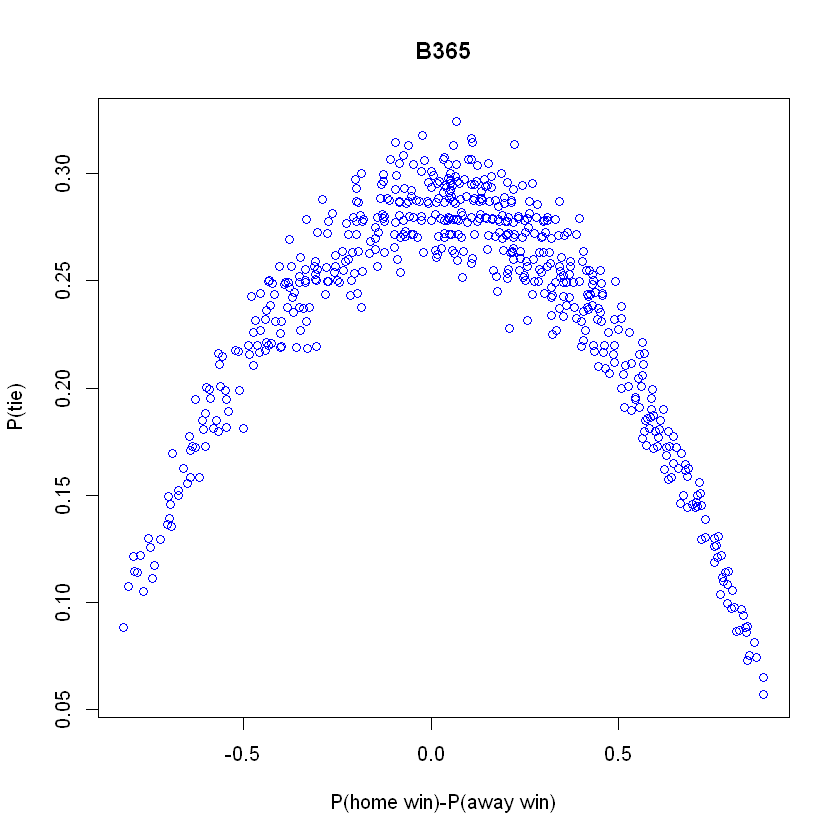

In [315]:
#Ploting actual probabilities
new_bahis365$diff = new_bahis365$B365H - new_bahis365$B365A
plot(new_bahis365$diff, new_bahis365$B365D,
    main="B365",
    xlab="P(home win)-P(away win)",
    ylab="P(tie)",
    col="blue"
    )

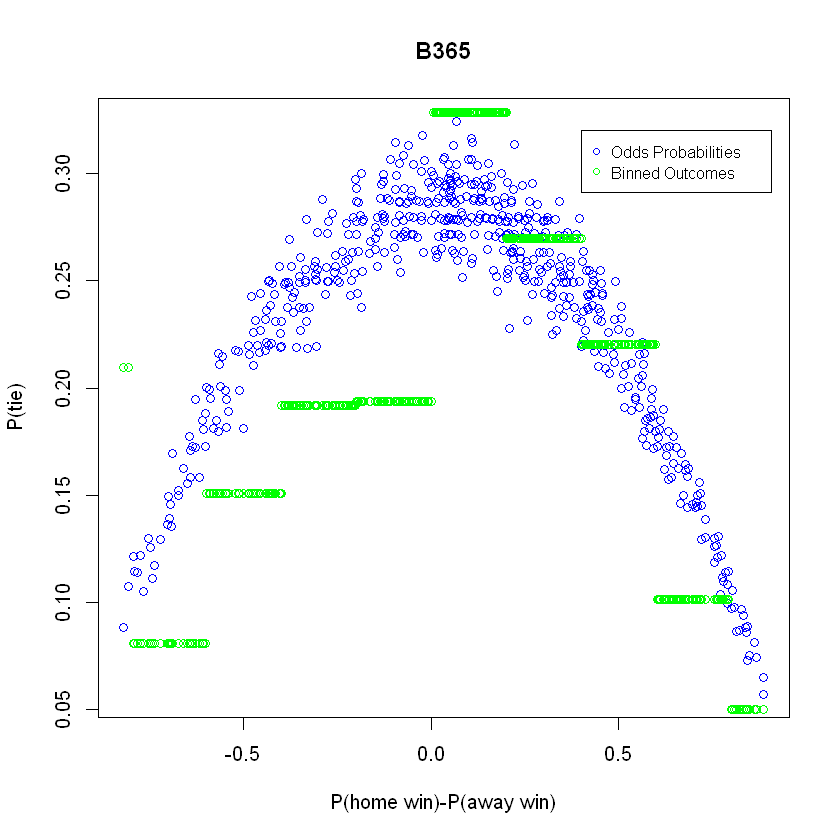

In [316]:
#discretizing P(home win) – P(away win) values into bins
new_bahis365$disc = cut(new_bahis365$diff, breaks=seq(-1,1,by=0.2))
len=length(new_bahis365$disc)
c1=0
c2=0
c3=0
c4=0
c5=0
c6=0
c7=0
c8=0
c9=0
c10=0
#calculating the number of games ended as “Draw” in the corresponding bin.
for (i in 1:len){
        if(new_bahis365$Res[i] == "D" & new_bahis365$disc[i] == "[-1,-0.8]" ){
            c1 = 1 + c1
        }else if(new_bahis365$Res[i] == "D" & new_bahis365$disc[i] == "(-0.8,-0.6]" ){
            c2 = 1 + c2
        }else if(new_bahis365$Res[i] == "D" & new_bahis365$disc[i] == "(-0.6,-0.4]" ){
            c3 = 1 + c3
        }else if(new_bahis365$Res[i] == "D" & new_bahis365$disc[i] == "(-0.4,-0.2]" ){
            c4 = 1 + c4
        }else if(new_bahis365$Res[i] == "D" & new_bahis365$disc[i] == "(-0.2,0]" ){
            c5 = 1 + c5
        }else if(new_bahis365$Res[i] == "D" & new_bahis365$disc[i] == "(0,0.2]" ){
            c6 = 1 + c6
        }else if(new_bahis365$Res[i] == "D" & new_bahis365$disc[i] == "(0.2,0.4]" ){
            c7 = 1 + c7
        }else if(new_bahis365$Res[i] == "D" & new_bahis365$disc[i] == "(0.4,0.6]" ){
            c8 = 1 + c8
        }else if(new_bahis365$Res[i] == "D" & new_bahis365$disc[i] == "(0.6,0.8]"){
            c9 = 1 + c9
        }else if(new_bahis365$Res[i] == "D" & new_bahis365$disc[i] == "(0.8,1]"){
            c10 = 1 + c10
        }
}
#Dividing the number of "Draws" according to bins
for (i in 1:len){
        if(new_bahis365$disc[i] == "[-1,-0.8]" ){
            new_bahis365$cdraw[i] = c1/(sum(new_bahis365$disc == "[-1,-0.8]"))
        }else if(new_bahis365$disc[i] == "(-0.8,-0.6]" ){
            new_bahis365$cdraw[i] = c2/(sum(new_bahis365$disc == "(-0.8,-0.6]"))
        }else if(new_bahis365$disc[i] == "(-0.6,-0.4]" ){
            new_bahis365$cdraw[i] = c3/(sum(new_bahis365$disc == "(-0.6,-0.4]"))
        }else if(new_bahis365$disc[i] == "(-0.4,-0.2]" ){
            new_bahis365$cdraw[i] = c4/(sum(new_bahis365$disc == "(-0.4,-0.2]"))
        }else if(new_bahis365$disc[i] == "(-0.2,0]" ){
            new_bahis365$cdraw[i] = c5/(sum(new_bahis365$disc == "(-0.2,0]"))
        }else if( new_bahis365$disc[i] == "(0,0.2]" ){
            new_bahis365$cdraw[i] = c6/(sum(new_bahis365$disc == "(0,0.2]"))
        }else if(new_bahis365$disc[i] == "(0.2,0.4]" ){
            new_bahis365$cdraw[i] = c7/(sum(new_bahis365$disc == "(0.2,0.4]"))
        }else if(new_bahis365$disc[i] == "(0.4,0.6]" ){
            new_bahis365$cdraw[i] = c8/(sum(new_bahis365$disc == "(0.4,0.6]"))
        }else if(new_bahis365$disc[i] == "(0.6,0.8]"){
            new_bahis365$cdraw[i] = c9/(sum(new_bahis365$disc == "(0.6,0.8]"))
        }else if(new_bahis365$disc[i] == "(0.8,1]"){
            new_bahis365$cdraw[i] = c10/(sum(new_bahis365$disc == "(0.8,1]"))
        }
}
#Ploting the results
    plot(new_bahis365$diff, new_bahis365$B365D,
    main="B365",
    xlab="P(home win)-P(away win)",
    ylab="P(tie)",
    col="blue"
    )
points(new_bahis365$diff,new_bahis365$cdraw,col="green")
            
legend(0.40, 0.32, legend=c("Odds Probabilities", "Binned Outcomes"),
col=c("blue", "green"), pch=c(1,1), cex=0.8)          


###### 
Probability calculated for (0,0.2] is larger than the probability proposed by the bookmaker and the value calculated in Task 2.So, betting on the corresponding bin can be made money in the long run.Probability calculated for the range (-0.4,-0.2] is lower than in task 2.

### Bookmaker BW

In [317]:
bahisBW$HR= data_overall[22]
bahisBW$AR= data_overall[23]
new_bahisBW = bahisBW %>% filter(HR==0 & AR==0)

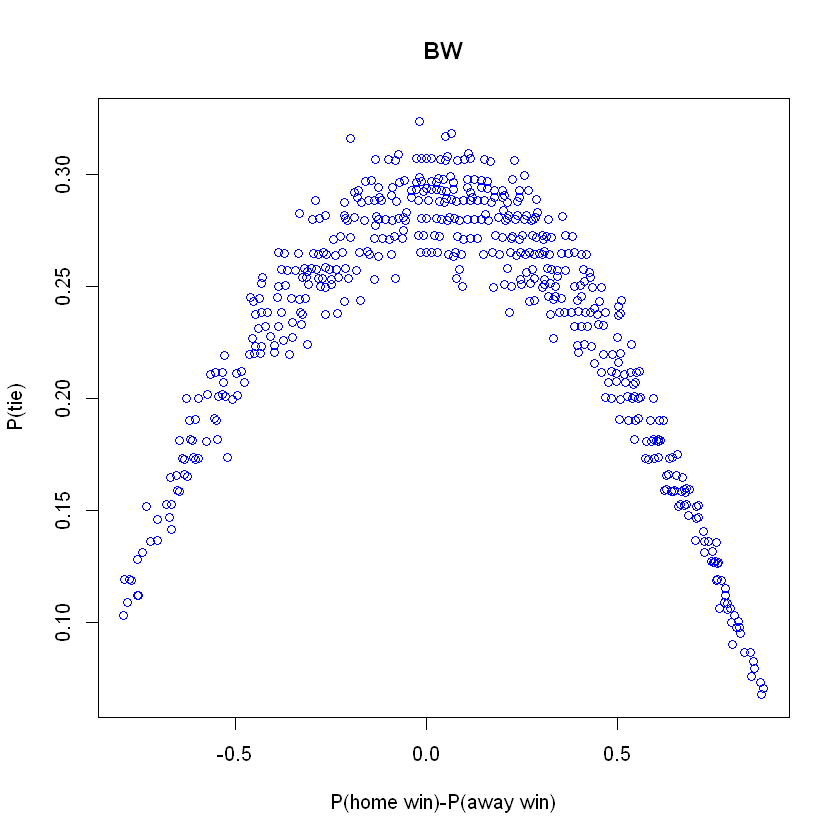

In [318]:
#Ploting actual probabilities
new_bahisBW$diff = new_bahisBW$BWH - new_bahisBW$BWA
plot(new_bahisBW$diff, new_bahisBW$BWD,
    main="BW",
    xlab="P(home win)-P(away win)",
    ylab="P(tie)",
    col="blue",
    )

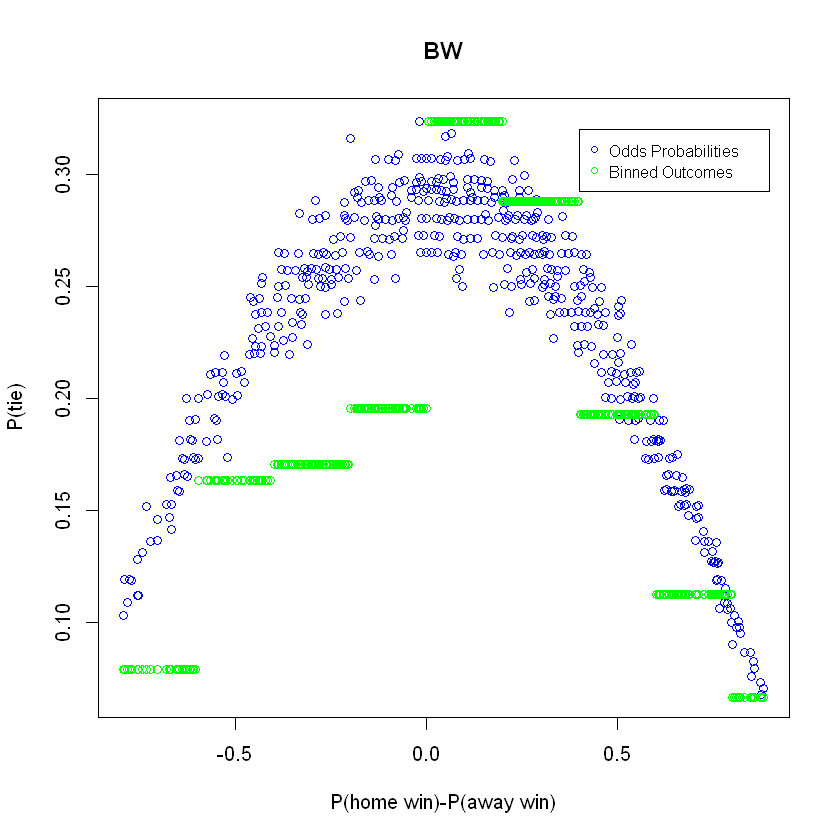

In [319]:
#discretizing P(home win) – P(away win) values into bins
new_bahisBW$disc = cut(new_bahisBW$diff, breaks=seq(-1,1,by=0.2))
len=length(new_bahisBW$disc)
c1_1=0
c2_1=0
c3_1=0
c4_1=0
c5_1=0
c6_1=0
c7_1=0
c8_1=0
c9_1=0
c1_10=0
#calculating the number of games ended as “Draw” in the corresponding bin.
for (i in 1:len){
        if(new_bahisBW$Res[i] == "D" & new_bahisBW$disc[i] == "[-1,-0.8]" ){
            c1_1 = 1 + c1_1
        }else if(new_bahisBW$Res[i] == "D" & new_bahisBW$disc[i] == "(-0.8,-0.6]" ){
            c2_1 = 1 + c2_1
        }else if(new_bahisBW$Res[i] == "D" & new_bahisBW$disc[i] == "(-0.6,-0.4]" ){
            c3_1 = 1 + c3_1
        }else if(new_bahisBW$Res[i] == "D" & new_bahisBW$disc[i] == "(-0.4,-0.2]" ){
            c4_1 = 1 + c4_1
        }else if(new_bahisBW$Res[i] == "D" & new_bahisBW$disc[i] == "(-0.2,0]" ){
            c5_1 = 1 + c5_1
        }else if(new_bahisBW$Res[i] == "D" & new_bahisBW$disc[i] == "(0,0.2]" ){
            c6_1 = 1 + c6_1
        }else if(new_bahisBW$Res[i] == "D" & new_bahisBW$disc[i] == "(0.2,0.4]" ){
            c7_1 = 1 + c7_1
        }else if(new_bahisBW$Res[i] == "D" & new_bahisBW$disc[i] == "(0.4,0.6]" ){
            c8_1 = 1 + c8_1
        }else if(new_bahisBW$Res[i] == "D" & new_bahisBW$disc[i] == "(0.6,0.8]"){
            c9_1 = 1 + c9_1
        }else if(new_bahisBW$Res[i] == "D" & new_bahisBW$disc[i] == "(0.8,1]"){
            c1_10 = 1 + c1_10
        }
}
#Dividing the number of "Draws" according to bins
for (i in 1:len){
        if(new_bahisBW$disc[i] == "[-1,-0.8]" ){
            new_bahisBW$cdraw[i] = c1_1/(sum(new_bahisBW$disc == "[-1,-0.8]"))
        }else if(new_bahisBW$disc[i] == "(-0.8,-0.6]" ){
            new_bahisBW$cdraw[i] = c2_1/(sum(new_bahisBW$disc == "(-0.8,-0.6]"))
        }else if(new_bahisBW$disc[i] == "(-0.6,-0.4]" ){
            new_bahisBW$cdraw[i] = c3_1/(sum(new_bahisBW$disc == "(-0.6,-0.4]"))
        }else if(new_bahisBW$disc[i] == "(-0.4,-0.2]" ){
            new_bahisBW$cdraw[i] = c4_1/(sum(new_bahisBW$disc == "(-0.4,-0.2]"))
        }else if(new_bahisBW$disc[i] == "(-0.2,0]" ){
            new_bahisBW$cdraw[i] = c5_1/(sum(new_bahisBW$disc == "(-0.2,0]"))
        }else if( new_bahisBW$disc[i] == "(0,0.2]" ){
            new_bahisBW$cdraw[i] = c6_1/(sum(new_bahisBW$disc == "(0,0.2]"))
        }else if(new_bahisBW$disc[i] == "(0.2,0.4]" ){
            new_bahisBW$cdraw[i] = c7_1/(sum(new_bahisBW$disc == "(0.2,0.4]"))
        }else if(new_bahisBW$disc[i] == "(0.4,0.6]" ){
            new_bahisBW$cdraw[i] = c8_1/(sum(new_bahisBW$disc == "(0.4,0.6]"))
        }else if(new_bahisBW$disc[i] == "(0.6,0.8]"){
            new_bahisBW$cdraw[i] = c9_1/(sum(new_bahisBW$disc == "(0.6,0.8]"))
        }else if(new_bahisBW$disc[i] == "(0.8,1]"){
            new_bahisBW$cdraw[i] = c1_10/(sum(new_bahisBW$disc == "(0.8,1]"))
        }
}
#Ploting the results
    plot(new_bahisBW$diff, new_bahisBW$BWD,
    main="BW",
    xlab="P(home win)-P(away win)",
    ylab="P(tie)",
    col="blue"
    )
points(new_bahisBW$diff,new_bahisBW$cdraw,col="green")
            
legend(0.40, 0.32, legend=c("Odds Probabilities", "Binned Outcomes"),
col=c("blue", "green"), pch=c(1,1), cex=0.8)

###### 
Probability calculated for (0,0.2] is larger than the probability proposed by the bookmaker and calculated values in task 2. So, betting on the corresponding bin can be made money in the long run. Probability calculated for the range (-0.4,-0.2] is lower than in task 2.

### Bookmaker IW

In [320]:
bahisIW$HR= data_overall[22]
bahisIW$AR= data_overall[23]
new_bahisIW = bahisIW %>% filter(HR==0 & AR==0)

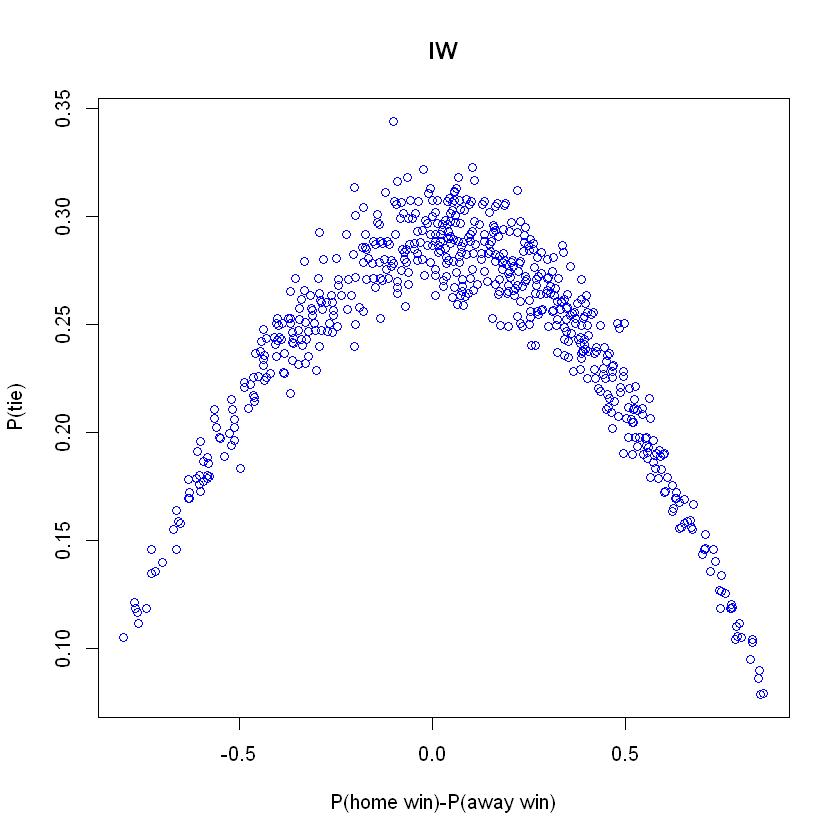

In [321]:
#Ploting actual probabilities
new_bahisIW$diff = new_bahisIW$IWH - new_bahisIW$IWA
plot(new_bahisIW$diff, new_bahisIW$IWD,
    main="IW",
    xlab="P(home win)-P(away win)",
    ylab="P(tie)",
    col="blue"
    )

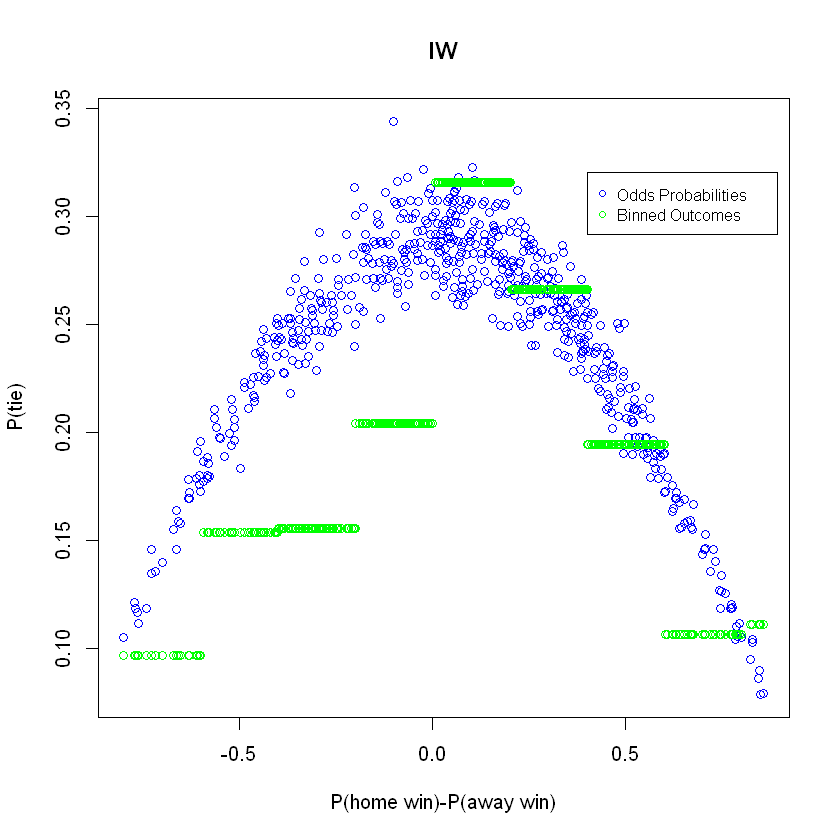

In [322]:
#discretizing P(home win) – P(away win) values into bins
new_bahisIW$disc = cut(new_bahisIW$diff, breaks=seq(-1,1,by=0.2))
len=length(new_bahisIW$disc)
c1_1=0
c2_1=0
c3_1=0
c4_1=0
c5_1=0
c6_1=0
c7_1=0
c8_1=0
c9_1=0
c1_10=0
#calculating the number of games ended as “Draw” in the corresponding bin.
for (i in 1:len){
        if(new_bahisIW$Res[i] == "D" & new_bahisIW$disc[i] == "[-1,-0.8]" ){
            c1_1 = 1 + c1_1
        }else if(new_bahisIW$Res[i] == "D" & new_bahisIW$disc[i] == "(-0.8,-0.6]" ){
            c2_1 = 1 + c2_1
        }else if(new_bahisIW$Res[i] == "D" & new_bahisIW$disc[i] == "(-0.6,-0.4]" ){
            c3_1 = 1 + c3_1
        }else if(new_bahisIW$Res[i] == "D" & new_bahisIW$disc[i] == "(-0.4,-0.2]" ){
            c4_1 = 1 + c4_1
        }else if(new_bahisIW$Res[i] == "D" & new_bahisIW$disc[i] == "(-0.2,0]" ){
            c5_1 = 1 + c5_1
        }else if(new_bahisIW$Res[i] == "D" & new_bahisIW$disc[i] == "(0,0.2]" ){
            c6_1 = 1 + c6_1
        }else if(new_bahisIW$Res[i] == "D" & new_bahisIW$disc[i] == "(0.2,0.4]" ){
            c7_1 = 1 + c7_1
        }else if(new_bahisIW$Res[i] == "D" & new_bahisIW$disc[i] == "(0.4,0.6]" ){
            c8_1 = 1 + c8_1
        }else if(new_bahisIW$Res[i] == "D" & new_bahisIW$disc[i] == "(0.6,0.8]"){
            c9_1 = 1 + c9_1
        }else if(new_bahisIW$Res[i] == "D" & new_bahisIW$disc[i] == "(0.8,1]"){
            c1_10 = 1 + c1_10
        }
}
#Dividing the number of "Draws" according to bins
for (i in 1:len){
        if(new_bahisIW$disc[i] == "[-1,-0.8]" ){
            new_bahisIW$cdraw[i] = c1_1/(sum(new_bahisIW$disc == "[-1,-0.8]"))
        }else if(new_bahisIW$disc[i] == "(-0.8,-0.6]" ){
            new_bahisIW$cdraw[i] = c2_1/(sum(new_bahisIW$disc == "(-0.8,-0.6]"))
        }else if(new_bahisIW$disc[i] == "(-0.6,-0.4]" ){
            new_bahisIW$cdraw[i] = c3_1/(sum(new_bahisIW$disc == "(-0.6,-0.4]"))
        }else if(new_bahisIW$disc[i] == "(-0.4,-0.2]" ){
            new_bahisIW$cdraw[i] = c4_1/(sum(new_bahisIW$disc == "(-0.4,-0.2]"))
        }else if(new_bahisIW$disc[i] == "(-0.2,0]" ){
            new_bahisIW$cdraw[i] = c5_1/(sum(new_bahisIW$disc == "(-0.2,0]"))
        }else if( new_bahisIW$disc[i] == "(0,0.2]" ){
            new_bahisIW$cdraw[i] = c6_1/(sum(new_bahisIW$disc == "(0,0.2]"))
        }else if(new_bahisIW$disc[i] == "(0.2,0.4]" ){
            new_bahisIW$cdraw[i] = c7_1/(sum(new_bahisIW$disc == "(0.2,0.4]"))
        }else if(new_bahisIW$disc[i] == "(0.4,0.6]" ){
            new_bahisIW$cdraw[i] = c8_1/(sum(new_bahisIW$disc == "(0.4,0.6]"))
        }else if(new_bahisIW$disc[i] == "(0.6,0.8]"){
            new_bahisIW$cdraw[i] = c9_1/(sum(new_bahisIW$disc == "(0.6,0.8]"))
        }else if(new_bahisIW$disc[i] == "(0.8,1]"){
            new_bahisIW$cdraw[i] = c1_10/(sum(new_bahisIW$disc == "(0.8,1]"))
        }
}
#Ploting the results
    plot(new_bahisIW$diff, new_bahisIW$IWD,
    main="IW",
    xlab="P(home win)-P(away win)",
    ylab="P(tie)",
    col="blue"
    )
points(new_bahisIW$diff,new_bahisIW$cdraw,col="green")
            
legend(0.40, 0.32, legend=c("Odds Probabilities", "Binned Outcomes"),
col=c("blue", "green"), pch=c(1,1), cex=0.8)

###### 
Probability calculated for (0,0.2] is larger than the probability proposed by the bookmaker and calculated values in task 2. So, betting on the corresponding bin can be made money in the long run, although there is no interval worthing to bet according to calculations in task 2. Probability calculated for the range (-0.4,-0.2] is lower than in task 2.

### Bookmaker PS

In [323]:
bahisPS$HR= data_overall[22]
bahisPS$AR= data_overall[23]
new_bahisPS = bahisPS %>% filter(HR==0 & AR==0)

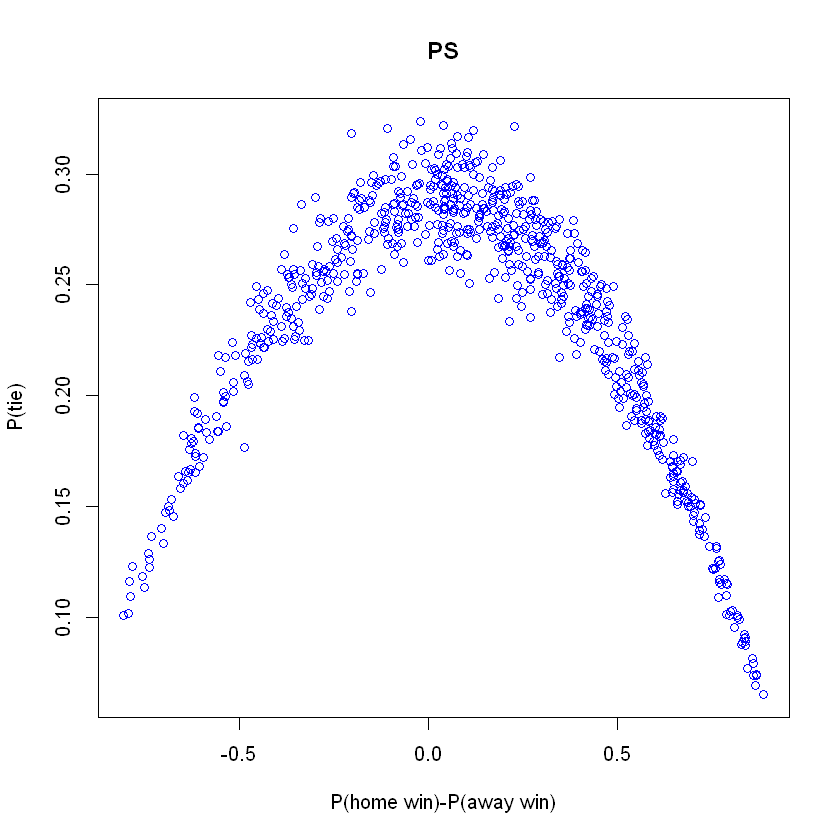

In [324]:
#Ploting actual probabilities
new_bahisPS$diff = new_bahisPS$PSH - new_bahisPS$PSA
plot(new_bahisPS$diff, new_bahisPS$PSD,
    main="PS",
    xlab="P(home win)-P(away win)",
    ylab="P(tie)",
    col="blue"
    )

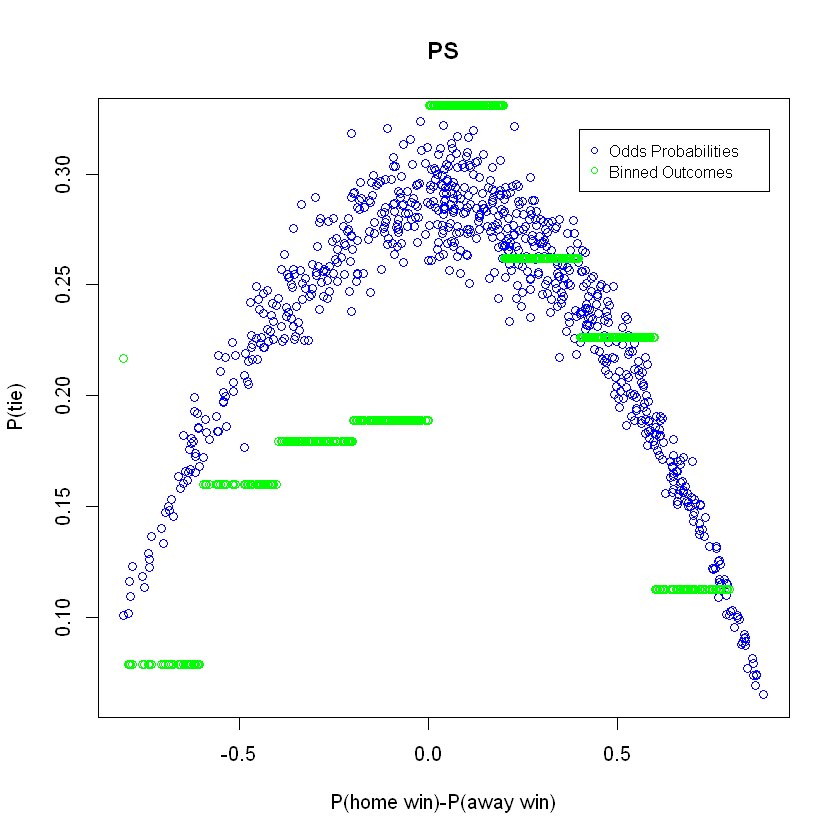

In [325]:
#discretizing P(home win) – P(away win) values into bins
new_bahisPS$disc = cut(new_bahisPS$diff, breaks=seq(-1,1,by=0.2))
len=length(new_bahisPS$disc)
c1_1=0
c2_1=0
c3_1=0
c4_1=0
c5_1=0
c6_1=0
c7_1=0
c8_1=0
c9_1=0
c1_10=0
#calculating the number of games ended as “Draw” in the corresponding bin.
for (i in 1:len){
        if(new_bahisPS$Res[i] == "D" & new_bahisPS$disc[i] == "[-1,-0.8]" ){
            c1_1 = 1 + c1_1
        }else if(new_bahisPS$Res[i] == "D" & new_bahisPS$disc[i] == "(-0.8,-0.6]" ){
            c2_1 = 1 + c2_1
        }else if(new_bahisPS$Res[i] == "D" & new_bahisPS$disc[i] == "(-0.6,-0.4]" ){
            c3_1 = 1 + c3_1
        }else if(new_bahisPS$Res[i] == "D" & new_bahisPS$disc[i] == "(-0.4,-0.2]" ){
            c4_1 = 1 + c4_1
        }else if(new_bahisPS$Res[i] == "D" & new_bahisPS$disc[i] == "(-0.2,0]" ){
            c5_1 = 1 + c5_1
        }else if(new_bahisPS$Res[i] == "D" & new_bahisPS$disc[i] == "(0,0.2]" ){
            c6_1 = 1 + c6_1
        }else if(new_bahisPS$Res[i] == "D" & new_bahisPS$disc[i] == "(0.2,0.4]" ){
            c7_1 = 1 + c7_1
        }else if(new_bahisPS$Res[i] == "D" & new_bahisPS$disc[i] == "(0.4,0.6]" ){
            c8_1 = 1 + c8_1
        }else if(new_bahisPS$Res[i] == "D" & new_bahisPS$disc[i] == "(0.6,0.8]"){
            c9_1 = 1 + c9_1
        }else if(new_bahisPS$Res[i] == "D" & new_bahisPS$disc[i] == "(0.8,1]"){
            c1_10 = 1 + c1_10
        }
}
#Dividing the number of "Draws" according to bins
for (i in 1:len){
        if(new_bahisPS$disc[i] == "[-1,-0.8]" ){
            new_bahisPS$cdraw[i] = c1_1/(sum(new_bahisPS$disc == "[-1,-0.8]"))
        }else if(new_bahisPS$disc[i] == "(-0.8,-0.6]" ){
            new_bahisPS$cdraw[i] = c2_1/(sum(new_bahisPS$disc == "(-0.8,-0.6]"))
        }else if(new_bahisPS$disc[i] == "(-0.6,-0.4]" ){
            new_bahisPS$cdraw[i] = c3_1/(sum(new_bahisPS$disc == "(-0.6,-0.4]"))
        }else if(new_bahisPS$disc[i] == "(-0.4,-0.2]" ){
            new_bahisPS$cdraw[i] = c4_1/(sum(new_bahisPS$disc == "(-0.4,-0.2]"))
        }else if(new_bahisPS$disc[i] == "(-0.2,0]" ){
            new_bahisPS$cdraw[i] = c5_1/(sum(new_bahisPS$disc == "(-0.2,0]"))
        }else if( new_bahisPS$disc[i] == "(0,0.2]" ){
            new_bahisPS$cdraw[i] = c6_1/(sum(new_bahisPS$disc == "(0,0.2]"))
        }else if(new_bahisPS$disc[i] == "(0.2,0.4]" ){
            new_bahisPS$cdraw[i] = c7_1/(sum(new_bahisPS$disc == "(0.2,0.4]"))
        }else if(new_bahisPS$disc[i] == "(0.4,0.6]" ){
            new_bahisPS$cdraw[i] = c8_1/(sum(new_bahisPS$disc == "(0.4,0.6]"))
        }else if(new_bahisPS$disc[i] == "(0.6,0.8]"){
            new_bahisPS$cdraw[i] = c9_1/(sum(new_bahisPS$disc == "(0.6,0.8]"))
        }else if(new_bahisPS$disc[i] == "(0.8,1]"){
            new_bahisPS$cdraw[i] = c1_10/(sum(new_bahisPS$disc == "(0.8,1]"))
        }
}
#Ploting the results
    plot(new_bahisPS$diff, new_bahisPS$PSD,
    main="PS",
    xlab="P(home win)-P(away win)",
    ylab="P(tie)",
    col="blue"
    )
points(new_bahisPS$diff,new_bahisPS$cdraw,col="green")
            
legend(0.40, 0.32, legend=c("Odds Probabilities", "Binned Outcomes"),
col=c("blue", "green"), pch=c(1,1), cex=0.8)

###### 
Probability calculated for (0,0.2] is larger than the probability proposed by the bookmaker and calculated values in task 2. So, betting on the corresponding bin can be made money in the long run. Probability calculated for the range (-0.4,-0.2] is lower than in task 2.